Explained variance by PC1: 72.77%
Explained variance by PC2: 23.03%


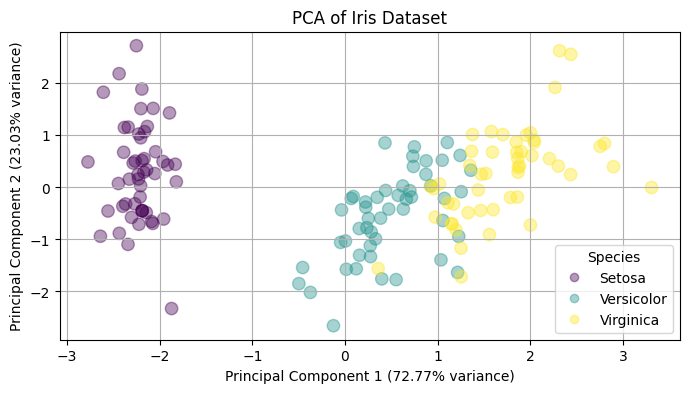

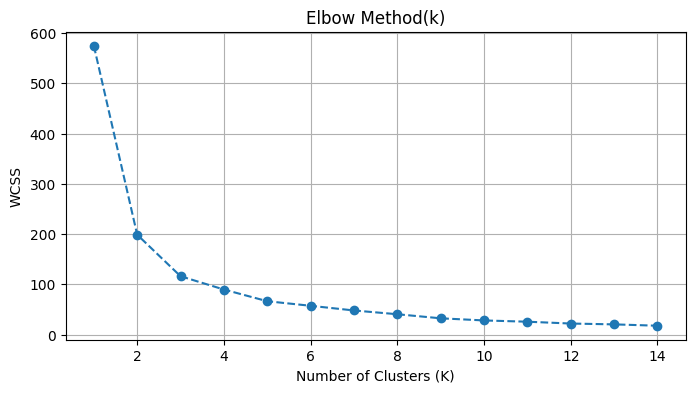

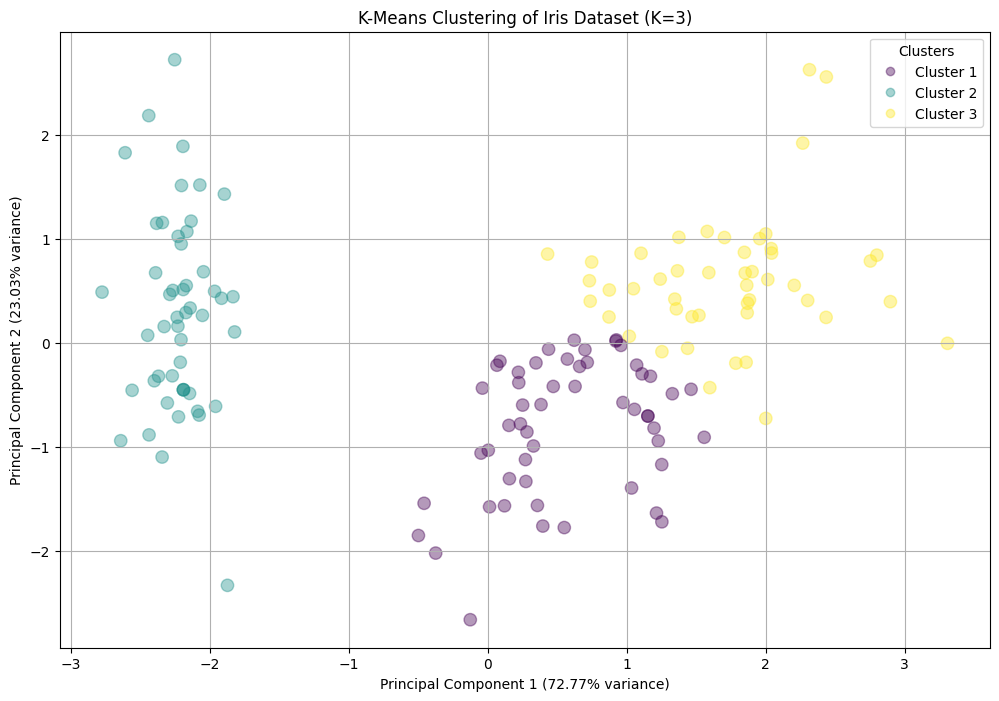

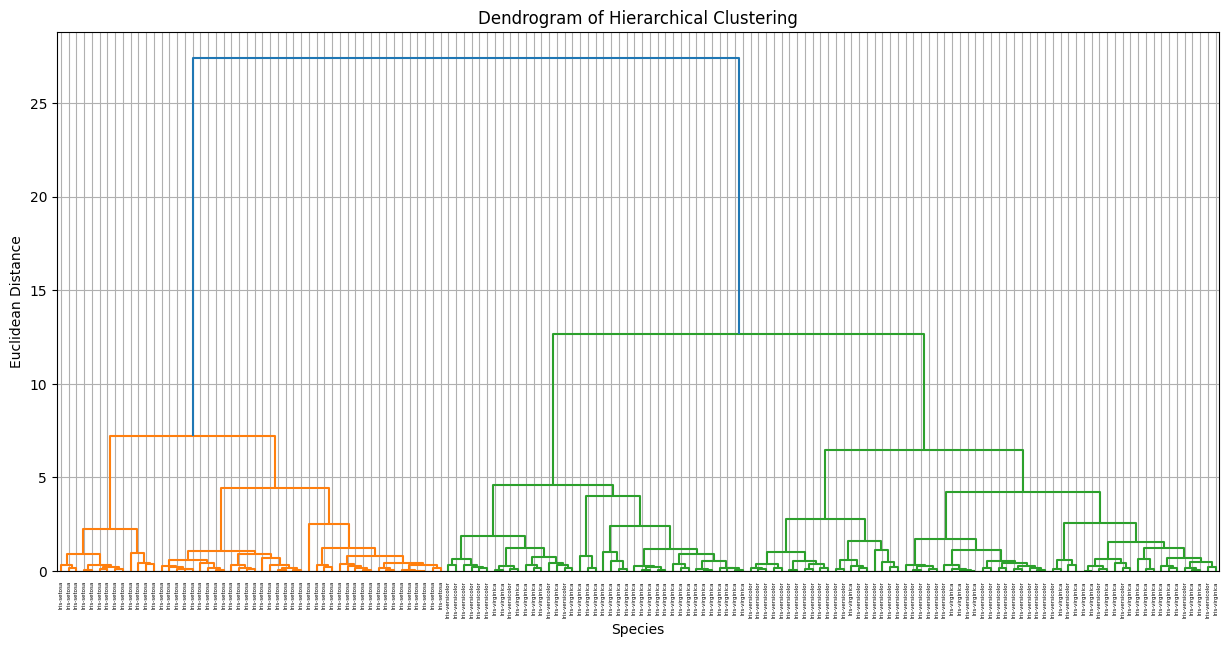


 Market Segmentation
Clustering: Groups customers based on their purchasing behavior or preferences for a specific marketing.
Example: marketing companies like Amazon use clustering to recommend products based on customers perovious searches, enhancing customer experience.
Dimensionality Reduction
Simplifies data for visualization/analysis by reducing features.
Example:Visualizing clusters of documents in a 2D plot to identify emerging research trends in fields like AI.




In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Loading the dataset
df = pd.read_csv('/content/Iris.csv')

# selecting features for clustering
features = df.drop(columns=['Id', 'Species'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_components_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]*100:.2f}%")
print(f"Explained variance by PC2: {explained_variance[1]*100:.2f}%")

# Visualize PCA results in a cluster form
plt.figure(figsize=(8, 4))
scatter = plt.scatter(principal_components_df['Principal Component 1'],
                      principal_components_df['Principal Component 2'],
                      c=df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}),
                      cmap='viridis', s=80, alpha=0.4)
plt.title('PCA of Iris Dataset')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Setosa', 'Versicolor', 'Virginica'], title='Species')
plt.grid(True)
plt.show()

# K-Means Clustering: Elbow Method
wcss = []
K = range(1, 15)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=42)
    kmeans.fit(principal_components_df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.title('Elbow Method(k)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# K-Means Clustering with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components_df)

# Visualize K-Means Clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(principal_components_df['Principal Component 1'],
                      principal_components_df['Principal Component 2'],
                      c=cluster_labels, cmap='viridis', s=80, alpha=0.4)
plt.title('K-Means Clustering of Iris Dataset (K=3)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 1', 'Cluster 2', 'Cluster 3'], title='Clusters')
plt.grid(True)
plt.show()

# Hierarchical Clustering: Dendrogram
plt.figure(figsize=(15,7))
linkage_matrix = linkage(principal_components_df, method='ward')
dendrogram(linkage_matrix, labels=df['Species'].values, leaf_rotation=90, leaf_font_size=4)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Species')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()



# Real-World Applications
print("""
 Market Segmentation
Clustering: Groups customers based on their purchasing behavior or preferences for a specific marketing.
Example: marketing companies like Amazon use clustering to recommend products based on customers perovious searches, enhancing customer experience.
Dimensionality Reduction
Simplifies data for visualization/analysis by reducing features.
Example:Visualizing clusters of documents in a 2D plot to identify emerging research trends in fields like AI.

""")